In [2]:
import pandas as pd
from ast import literal_eval

In [6]:
preprocess_meta = pd.read_csv('preprocessed_meta.csv')
preprocess_meta.head()

,seriesuid,spacing,lungs_bounding_box,centers,radii,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,"[1.7999999523162842, 0.64453125, 0.64453125]","[(0, 16, 11), (349, 263, 321)]","[(77, 211, 44), (117, 154, 405)]","[2.8257353175, 2.1123542405]",1
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,"[1.7999999523162842, 0.625, 0.625]","[(0, 23, 31), (283, 235, 282)]","[(88, 269, 384)]",[2.893173907],1
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,"[1.0, 0.556640625, 0.556640625]","[(0, 46, 21), (321, 258, 263)]","[(265, 328, 172), (251, 292, 220), (230, 250, ...","[4.0716308415, 9.272574985, 9.10428514, 8.1906...",1
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028...,"[2.5, 0.703125, 0.703125]","[(0, 86, 51), (332, 307, 331)]","[(76, 288, 354)]",[5.18116044],1
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,"[2.5, 0.859375, 0.859375]","[(0, 121, 62), (358, 376, 382)]","[(121, 279, 354)]",[10.544809315],1


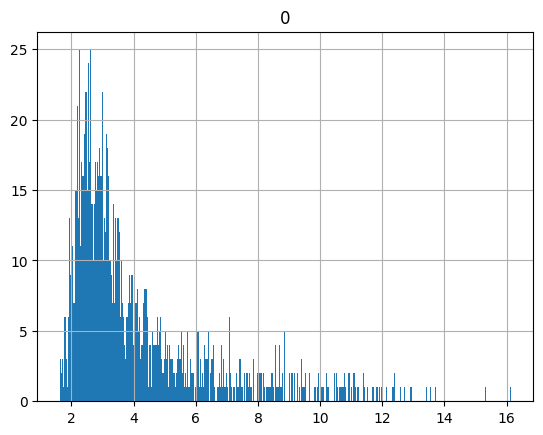

In [16]:
flat = []
for diameters in preprocess_meta.radii:
    parsed = literal_eval(diameters)
    for dia in parsed:
        flat.append(dia)

result = pd.DataFrame(flat)
hist = result.hist(bins=400)

In [2]:
def _get_patches(rec):
    seriesuid = rec['seriesuid']
    spacing = literal_eval(rec['spacing'])
    lungs_bounding_box = literal_eval(rec['lungs_bounding_box'])
    centers = literal_eval(rec['centers'])
    radii = literal_eval(rec['radii'])
    clazz = int(rec['class'])
    
    print(lungs_bounding_box)

In [4]:
augmentation_meta = pd.DataFrame(
    columns=[
        'seriesuid', 'sub_index', 'centers',
        'lungs_bounding_box', 'radii', 'class'
        ]
    )
list_of_positives = []
list_of_negatives = []
for rec in preprocess_meta.loc[preprocess_meta['class'] == 1].iloc:
    list_of_positives += _get_patches(rec)

,seriesuid,spacing,lungs_bounding_box,centers,radii,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,"[1.7999999523162842, 0.64453125, 0.64453125]","[(0, 16, 11), (349, 263, 321)]","[(77, 211, 44), (117, 154, 405)]","[2.8257353175, 2.1123542405]",1
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,"[1.7999999523162842, 0.625, 0.625]","[(0, 23, 31), (283, 235, 282)]","[(88, 269, 384)]",[2.893173907],1
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,"[1.0, 0.556640625, 0.556640625]","[(0, 46, 21), (321, 258, 263)]","[(265, 328, 172), (251, 292, 220), (230, 250, ...","[4.0716308415, 9.272574985, 9.10428514, 8.1906...",1
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028...,"[2.5, 0.703125, 0.703125]","[(0, 86, 51), (332, 307, 331)]","[(76, 288, 354)]",[5.18116044],1
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,"[2.5, 0.859375, 0.859375]","[(0, 121, 62), (358, 376, 382)]","[(121, 279, 354)]",[10.544809315],1
